\begin{align*}
\begin{cases}
& x_{n+1}=(I+\eta F^{0}(\alpha_n)) x_n+\sqrt{\eta}G^{0}(\alpha_n)u_n, \quad x_0=\left[\begin{matrix} 1 \\ -1 \end{matrix}\right]\\
& y_{n+1}=y_n+\eta H(\alpha_n)x_n+\sqrt{\eta} \sigma_0 v_n, \quad \sigma_0=0.5
\end{cases}
\end{align*}

2021-2-1: $\eta=0.04, N=100, n0=10 $ and let 
$\sigma_0=\begin{bmatrix}0.2 & 0.05\\ 0 & 0.2\end{bmatrix}$

Change the Markov Chain.

In [1]:
import regime1_loader
import numpy as np
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

In [2]:
PATH_TRAIN='../Temp/Datav2/Regime1Train4.pklz'
PATH_NEW='../Temp/Datav2/Regime1New4.pklz'
x0=np.array([[1],[-1]]); 
dimX=2; N=100; n0=10; eta=0.04

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=regime1_loader.load_data_wrapper(PATH_TRAIN)
datas,labels,x_new=regime1_loader.load_new_data(PATH_NEW)
# Prepare test data to predict
test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),2)
len(training_data)

16956

In [4]:
net=nn_DF.Network([20,32,16,8,8,2])

In [6]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, 50, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5,tcRel_constlr5, ecMSE_constlr5,ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, 50, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr6, tcRel_constlr6, ecMSE_constlr6,ecRel_constlr6, w_constlr6, b_constlr6, constlr6\
=net.SGD_Constlr(training_data, 50, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.7605819291138389
The eta of Epoch 1 is 0.001
Epoch 1: 0.6735736061228312
The eta of Epoch 2 is 0.001
Epoch 2: 0.6033162679220957
The eta of Epoch 3 is 0.001
Epoch 3: 0.5642702468766463
The eta of Epoch 4 is 0.001
Epoch 4: 0.5466403325498652
The eta of Epoch 5 is 0.001
Epoch 5: 0.535855288959715
The eta of Epoch 6 is 0.001
Epoch 6: 0.528003367932766
The eta of Epoch 7 is 0.001
Epoch 7: 0.5208444699896814
The eta of Epoch 8 is 0.001
Epoch 8: 0.5138572503718725
The eta of Epoch 9 is 0.001
Epoch 9: 0.5066555754151412
The eta of Epoch 10 is 0.001
Epoch 10: 0.500258463290241
The eta of Epoch 11 is 0.001
Epoch 11: 0.4930816435413748
The eta of Epoch 12 is 0.001
Epoch 12: 0.4864582128164322
The eta of Epoch 13 is 0.001
Epoch 13: 0.4796796153012421
The eta of Epoch 14 is 0.001
Epoch 14: 0.4709642331332527
The eta of Epoch 15 is 0.001
Epoch 15: 0.4618174459588024
The eta of E

In [5]:
tcMSE_EpochAdalr1, tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data,  50, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  50, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr6, tcRel_EpochAdalr6, ecMSE_EpochAdalr6, ecRel_EpochAdalr6, w_EpochAdalr6, b_EpochAdalr6, EpochAdalr6\
=net.SGD_EpochAdalr(training_data, 50, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001096304180665041
Epoch 0: 0.760765638267472
The eta of Epoch 1 is 0.0012140344843076486
Epoch 1: 0.6657013102396857
The eta of Epoch 2 is 0.0012824088236504873
Epoch 2: 0.58743725530166
The eta of Epoch 3 is 0.0013134678655587336
Epoch 3: 0.5532892085223654
The eta of Epoch 4 is 0.0013417040461412475
Epoch 4: 0.5367268888419148
The eta of Epoch 5 is 0.0013517100436459893
Epoch 5: 0.5260916826721747
The eta of Epoch 6 is 0.0013627284434420232
Epoch 6: 0.5170617418087798
The eta of Epoch 7 is 0.0013893778740299671
Epoch 7: 0.5088913165869374
The eta of Epoch 8 is 0.0014009892214677127
Epoch 8: 0.49808895173191237
The eta of Epoch 9 is 0.0014129617227317559
Epoch 9: 0.4881509156159481
The eta of Epoch 10 is 0.0014272003499149304
Epoch 10: 0.47785249325350704
The eta of Epoch 11 is 0.0014446703632362134
Epoch 11: 0.4653186417631794
The eta of Epoch 12 is 0.0014646864919763325
Epoch 12: 0

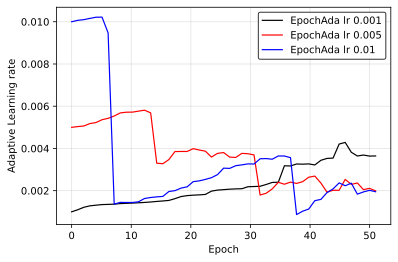

In [12]:
epochs=np.linspace(0,51,51)
plt.plot(epochs,EpochAdalr1,'k', epochs,EpochAdalr5, 'r',epochs, EpochAdalr6,'b',linewidth=1.2)
plt.grid(alpha=0.35)
plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
plt.xlabel("Epoch")
plt.ylabel("Adaptive Learning rate")
plt.savefig("../Temp/Imagesv2/Regime1_lr4.pdf", dpi=600,bbox_inches = 'tight')

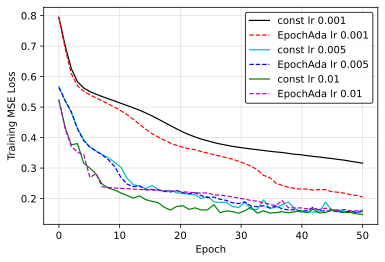

In [13]:
Epochs=np.linspace(0,50,50)
plt.plot(Epochs, tcMSE_constlr1, 'k', Epochs, tcMSE_EpochAdalr1,"r--", Epochs, tcMSE_constlr5,'c',\
         Epochs,tcMSE_EpochAdalr5,'b--',Epochs, tcMSE_constlr6,'g',Epochs,tcMSE_EpochAdalr6,'m--',linewidth=1.2)
plt.grid(alpha=0.35)
plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
plt.xlabel("Epoch")
plt.ylabel("Training MSE Loss")
plt.savefig("../Temp/Imagesv2/Regime1_loss4.pdf", dpi=600,bbox_inches = 'tight')

In [ ]:
# Epochs=np.linspace(0,50,50)
# plt.plot(Epochs, tcRel_constlr1, 'k', Epochs,tcRel_EpochAdalr1,"r--",Epochs, tcRel_constlr5,'c',\
#          Epochs,tcRel_EpochAdalr5,'b--',Epochs, tcRel_constlr6,'g',Epochs,tcRel_EpochAdalr6,'m--')
# plt.grid(alpha=0.35)
# plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
# plt.xlabel("Epoch")
# plt.ylabel("Training Relative Error")
#plt.savefig("../Temp/Imagesv1/Regime1_loss4.pdf", dpi=600,bbox_inches = 'tight')

### Print out the relative error on test data

In [9]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and RelErr are: {0},{1}".format(mseErr, RelErr))

In [10]:
testPred_constlr1=net.predict(test_data_data, w_constlr1, b_constlr1, label=False)
testPred_constlr5=net.predict(test_data_data, w_constlr5, b_constlr5, label=False)
testPred_constlr6=net.predict(test_data_data, w_constlr6, b_constlr6, label=False)
testPred_EpochAdalr1=net.predict(test_data_data, w_EpochAdalr1, b_EpochAdalr1, label=False)
testPred_EpochAdalr5=net.predict(test_data_data, w_EpochAdalr5, b_EpochAdalr5, label=False)
testPred_EpochAdalr6=net.predict(test_data_data, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(testPred_constlr1, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_constlr5, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_constlr6, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr1, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr5, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr6, test_data_label, label_mean, label_std, dimX)

MSE and RelErr are: 0.9433785803708621,0.28050242072173437
MSE and RelErr are: 0.4699275952030143,0.187015227582584
MSE and RelErr are: 0.42902192265478406,0.1818677414403382
MSE and RelErr are: 0.608733906274197,0.21908178696475458
MSE and RelErr are: 0.4521752382787704,0.18292911682650875
MSE and RelErr are: 0.45778289051522486,0.18488018962510977


### Repeat 256 times of Monte Carlo

In [30]:
import regime1_generator
N_sample=256
TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
for i in range(256):
    datas1, labels1, x_new1=regime1_generator.generate_new_data(data_mean, data_std)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [31]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr6=net.predict(TotalDatas, w_constlr6, b_constlr6, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr6=net.predict(TotalDatas, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr6, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr6, TotalLabels, label_mean, label_std, dimX)

MSE and RelErr are: 1.0865907493038542,0.280750521483122
MSE and RelErr are: 0.5656467195526398,0.18925636386153596
MSE and RelErr are: 0.4996341727809175,0.18120290880428966
MSE and RelErr are: 0.7300808517651569,0.22002211080311945
MSE and RelErr are: 0.5262752066075522,0.18254067851477704
MSE and RelErr are: 0.5418013267005772,0.1855865757391426


In [11]:
# epochs=np.linspace(0,51,51)
# plt.plot(epochs,EpochAdalr1, epochs,EpochAdalr2, epochs, EpochAdalr3)
# plt.legend(["initial lr 0.001","initial lr 0.003", "initial lr 0.005"],edgecolor="black")
# plt.xlabel("Epoch")
# plt.ylabel("Adaptive learning rate")
#plt.savefig("../Temp/Regime1256_lr.pdf",dpi=600,bbox_inches = 'tight')

In [12]:
# tc_timeBasedlr,ec_timeBasedlr, w_timeBasedlr, b_timeBasedlr,timeBasedlr\
# =net.SGD_TimeBasedlr(training_data, 50, 128, 0.001, 0.001, evaluation_data=validation_data)
# tc_stepBasedlr, ec_stepBasedlr,w_stepBasedlr, b_stepBasedlr,stepBasedlr\
# =net.SGD_StepBasedlr(training_data, 50, 128, 0.001, 0.5, 10,evaluation_data=validation_data)
# tc_expBasedlr, ec_expBasedlr,w_expBasedlr,b_expBasedlr,expBasedlr\
# =net.SGD_ExpBasedlr(training_data, 50, 128, 0.001, 0.0001, evaluation_data=validation_data)

In [13]:
# plt.plot(epochs, tc_constlr1,epochs,tc_constlr2,epochs,tc_constlr3,epochs,tc_EpochAdalr,\
#          epochs, tc_timeBasedlr,epochs,tc_stepBasedlr,epochs, tc_expBasedlr)
# plt.legend(["Const lr =0.001","Const lr =0.005","Const lr =0.01","EpochAda lr","TimeBased lr","StepBased lr","ExpBased lr"],edgecolor='black')
# plt.xlabel("Epoch")
# plt.ylabel("Train cost")
#plt.savefig("../SmallScale/images/Regime1Small_tc1.pdf", dpi=600)

### Plot on new data and compute relative error on new data

In [11]:
newPred_constlr1=net.predict(datas, w_constlr1, b_constlr1, label=False)
newPred_constlr5=net.predict(datas, w_constlr5, b_constlr5, label=False)
newPred_constlr6=net.predict(datas, w_constlr6, b_constlr6, label=False)
newPred_EpochAdalr1=net.predict(datas, w_EpochAdalr1, b_EpochAdalr1, label=False)
newPred_EpochAdalr5=net.predict(datas, w_EpochAdalr5, b_EpochAdalr5, label=False)
newPred_EpochAdalr6=net.predict(datas, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(newPred_constlr1, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_constlr5, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_constlr6, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr1, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr5, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr6, x_new[n0-1:], label_mean, label_std, dimX)

MSE and RelErr are: 0.4129119157540283,0.2560841471131722
MSE and RelErr are: 0.32778449135018073,0.23041455871615757
MSE and RelErr are: 0.42159188601263764,0.24324044926686902
MSE and RelErr are: 0.36783839504044996,0.22895988218173835
MSE and RelErr are: 0.3878577654992865,0.23869368309795838
MSE and RelErr are: 0.36679188665608753,0.2328623742505355


In [18]:
tcMSE_constlr3, tcRel_constlr3, ecMSE_constlr3, ecRel_constlr3, w_constlr3, b_constlr3, constlr3\
=net.SGD_Constlr(training_data, 50, 64, 0.003, evaluation_data=validation_data)
tcMSE_EpochAdalr3, tcRel_EpochAdalr3, ecMSE_EpochAdalr3, ecRel_EpochAdalr3, w_EpochAdalr3, b_EpochAdalr3, EpochAdalr3\
=net.SGD_EpochAdalr(training_data, 50, 64, 0.003, 0.001, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.003
The eta of Epoch 0 is 0.003
Epoch 0: 0.6029479533577399
The eta of Epoch 1 is 0.003
Epoch 1: 0.5358651955594994
The eta of Epoch 2 is 0.003
Epoch 2: 0.5169429669296084
The eta of Epoch 3 is 0.003
Epoch 3: 0.49334038983000295
The eta of Epoch 4 is 0.003
Epoch 4: 0.4715485192379025
The eta of Epoch 5 is 0.003
Epoch 5: 0.4431428466523024
The eta of Epoch 6 is 0.003
Epoch 6: 0.4107074129182089
The eta of Epoch 7 is 0.003
Epoch 7: 0.3902824334773041
The eta of Epoch 8 is 0.003
Epoch 8: 0.3758448983430386
The eta of Epoch 9 is 0.003
Epoch 9: 0.3713146341498065
The eta of Epoch 10 is 0.003
Epoch 10: 0.3597571503950467
The eta of Epoch 11 is 0.003
Epoch 11: 0.3525942281124738
The eta of Epoch 12 is 0.003
Epoch 12: 0.3474875866944434
The eta of Epoch 13 is 0.003
Epoch 13: 0.33749255395371713
The eta of Epoch 14 is 0.003
Epoch 14: 0.3296792414326137
The eta of Epoch 15 is 0.003
Epoch 15: 0.3225307975419443
The eta

In [23]:
df_pred1=net.predict(datas,w_constlr3, b_constlr3,label=False)
df_pred1=np.array(df_pred1)
df_pred1=df_pred1.reshape(len(df_pred1),dimX)
for k in range(N-n0+2):
    df_pred1[k,:]=df_pred1[k,:]*label_std+label_mean
df_new1=[x0 for k in range(n0-1)]
df_new1=np.array(df_new1)
df_new1=df_new1.reshape(n0-1,dimX)
df_new1=np.vstack((df_new1, df_pred1))
new_mse1=mean_squared_error(x_new[n0-1:], df_pred1)
new_rel1=relative_err(x_new[n0-1:], df_pred1)
print("MSE error and relative error on new data:{0},{1}".format(new_mse1,new_rel1))

MSE error and relative error on new data:0.3250753298537035,0.21964760471425468


In [24]:
df_pred3=net.predict(datas,w_EpochAdalr3, b_EpochAdalr3,label=False)
df_pred3=np.array(df_pred3)
df_pred3=df_pred3.reshape(len(df_pred3),dimX)
for k in range(N-n0+2):
    df_pred3[k,:]=df_pred3[k,:]*label_std+label_mean
df_new3=[x0 for k in range(n0-1)]
df_new3=np.array(df_new3)
df_new3=df_new3.reshape(n0-1,dimX)
df_new3=np.vstack((df_new3,df_pred3))
new_mse3=mean_squared_error(x_new[n0-1:], df_pred3)
new_rel3=relative_err(x_new[n0-1:], df_pred3)
print("MSE error and relative error on new data: {0}, {1}".format(new_mse3,new_rel3))

MSE error and relative error on new data: 0.36606225612690557, 0.2332623560926146


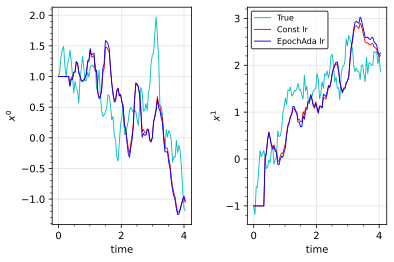

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
axis=np.linspace(0,eta*(N+1),N+1)
fig, ax=plt.subplots(1,2)
ax[0].plot(axis,x_new[:,0],'c',axis,df_new1[:,0],'r',axis, df_new3[:,0],'b',linewidth=0.9)
ax[0].minorticks_on()
ax[0].set_xlabel('time'); ax[0].set_ylabel('$x^0$')
ax[0].grid(alpha=0.35)
#--------------------------------
ax[1].plot(axis, x_new[:,1],'c',axis,df_new1[:,1],'r',axis, df_new3[:,1],'b',linewidth=0.9)
ax[1].minorticks_on()
ax[1].set_xlabel('time'); ax[1].set_ylabel('$x^1$')
fig.subplots_adjust(wspace=0.4, hspace=0.5)
ax[1].grid(alpha=0.35)
ax[1].legend(["True","Const lr","EpochAda lr"],prop={'size':8},edgecolor="black")
plt.savefig("../Temp/Imagesv2/Regime1_path3.pdf", dpi=600,bbox_inches = 'tight')

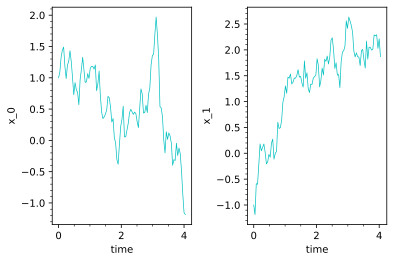

In [17]:
fig, ax=plt.subplots(1,2)
axis=np.linspace(0,eta*(N+1),N+1)
ax[0].plot(axis,x_new[:,0],'c',linewidth=0.7)
ax[0].minorticks_on()
ax[0].set_xlabel('time'); ax[0].set_ylabel('x_0')
#--------------------------------
ax[1].plot(axis, x_new[:,1],'c',linewidth=0.7)
ax[1].minorticks_on()
ax[1].set_xlabel('time'); ax[1].set_ylabel('x_1')
fig.subplots_adjust(wspace=0.4, hspace=0.5)
#plt.savefig("../SmallScale/images/Regime1Small_path1.pdf",dpi=600, bbox_inches="tight")